In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors


In [3]:

f = '../../ERA5 date/precip_diaria.csv'
dados = pd.read_csv(f, encoding="latin1")
df = dados

In [8]:
df[0:50]

,Date,Latitude,Longitude,Precipitation
0,2004-01-01 11:30:00,-9.13,-77.65,6.356016
1,2004-01-01 11:30:00,-9.13,-77.40,3.878843
2,2004-01-01 11:30:00,-9.38,-77.65,3.138585
3,2004-01-01 11:30:00,-9.38,-77.40,4.217723
4,2004-01-01 11:30:00,-9.63,-77.65,5.522382
5,2004-01-01 11:30:00,-9.63,-77.40,7.183880
6,2004-01-01 11:30:00,-9.88,-77.65,7.863356
7,2004-01-01 11:30:00,-9.88,-77.40,7.974097
8,2004-01-02 11:30:00,-9.13,-77.65,11.964359
9,2004-01-02 11:30:00,-9.13,-77.40,5.114022


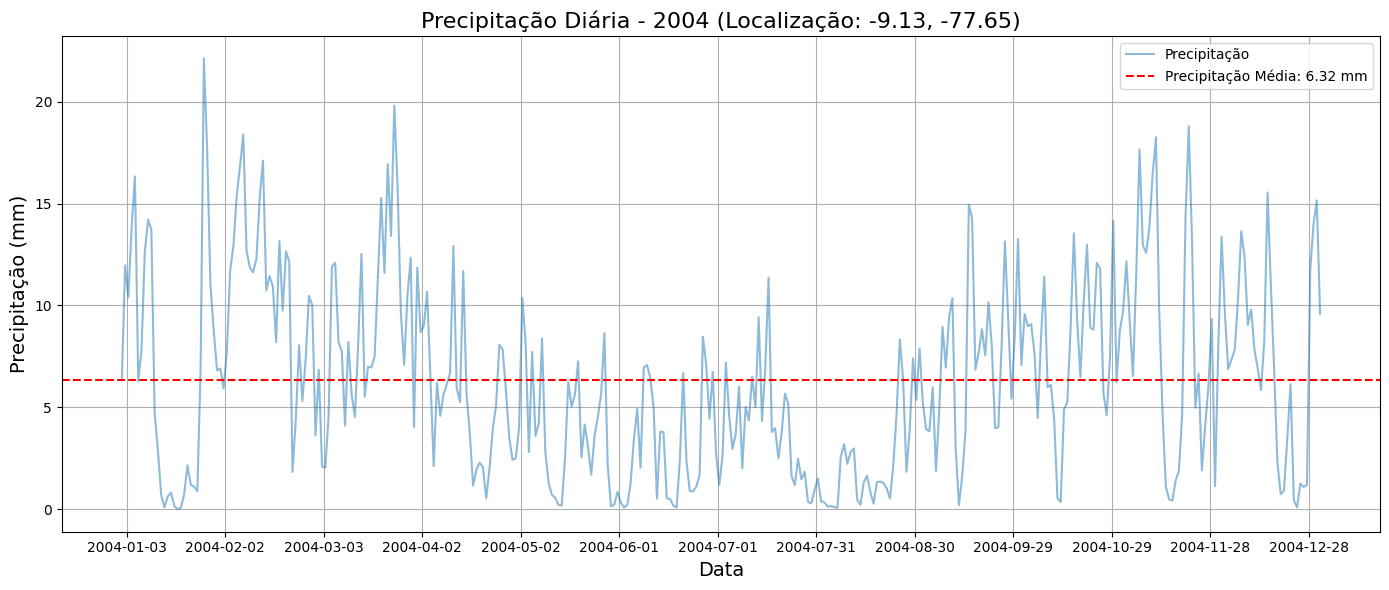

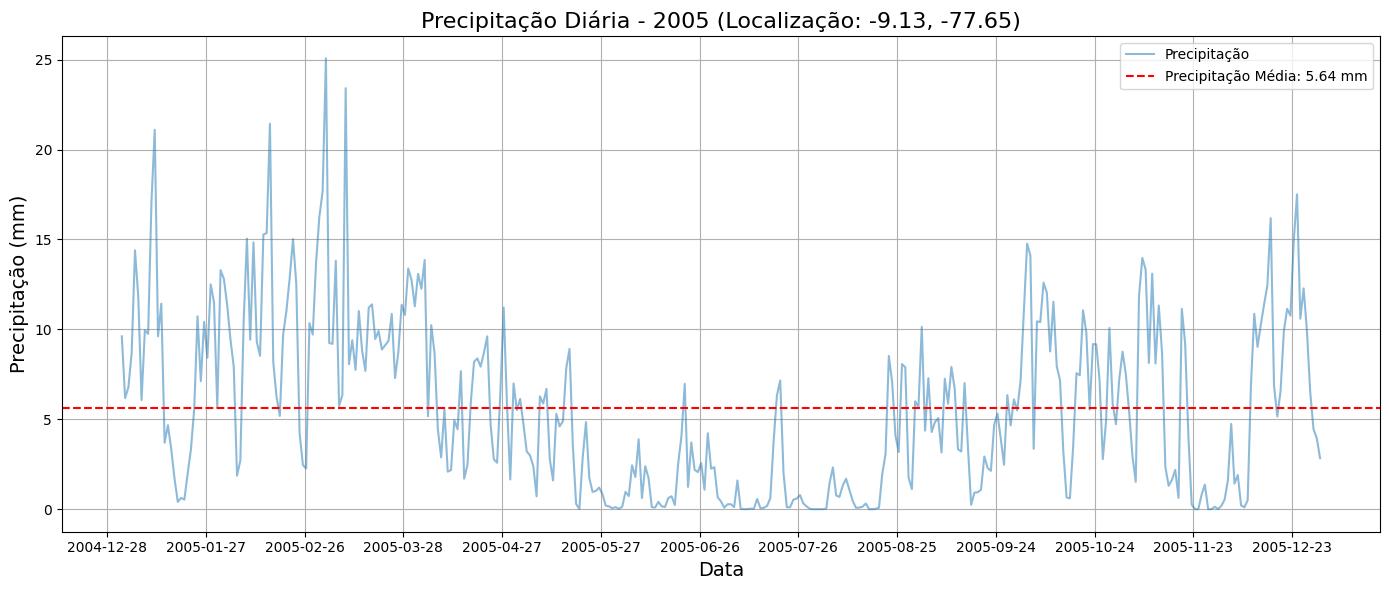

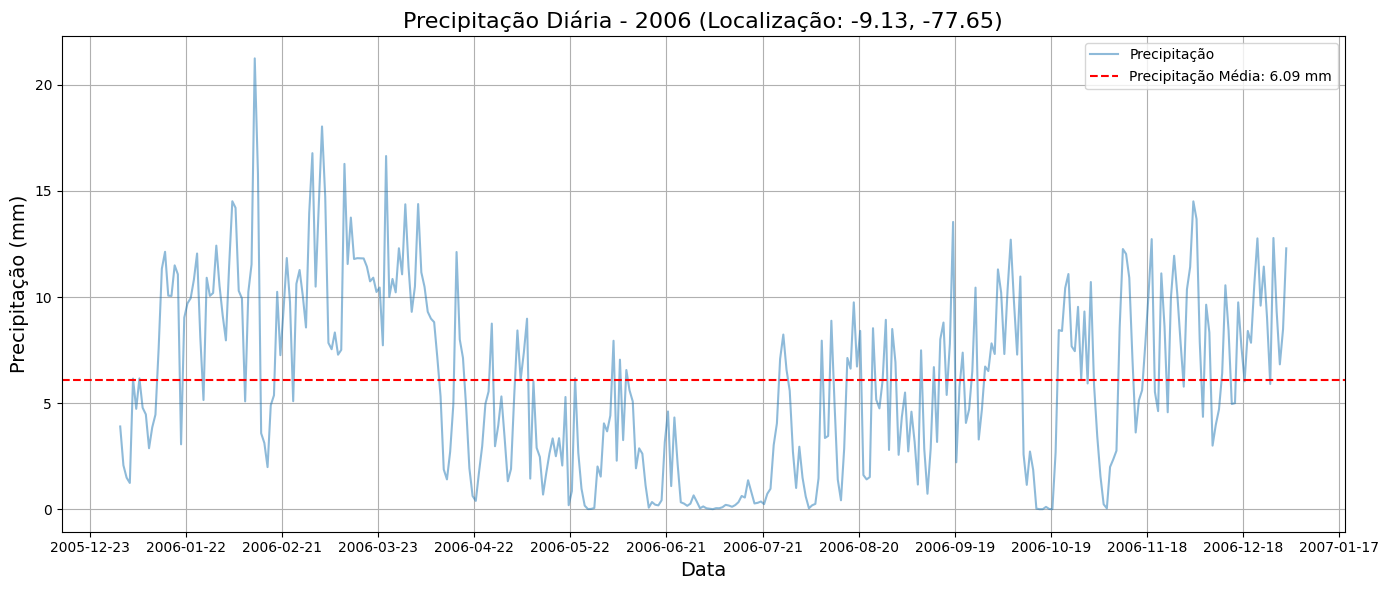

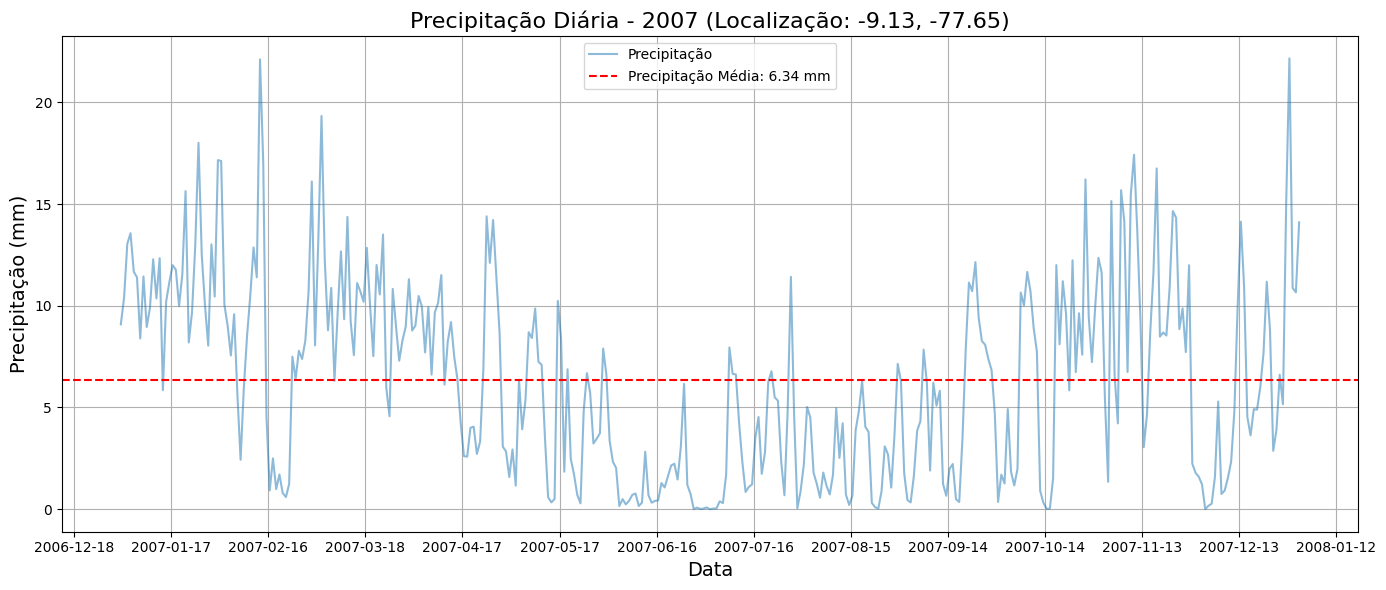

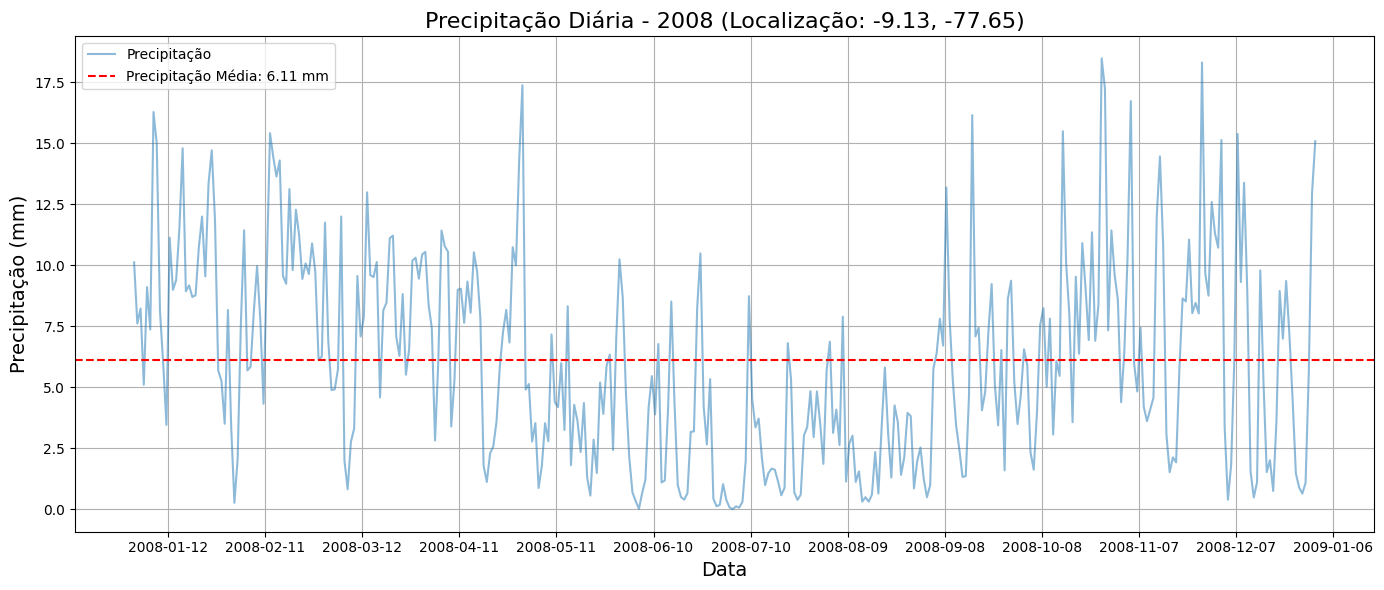

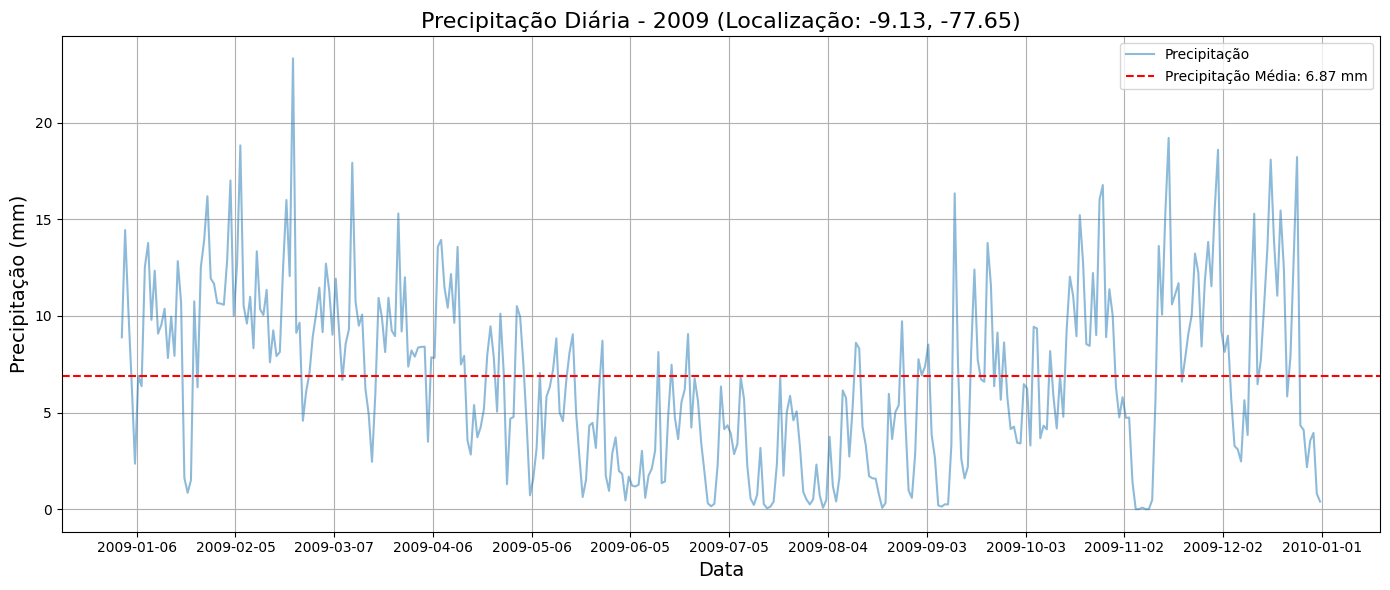

In [9]:


# Converter a coluna 'Date' para o formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filtrar os dados para uma localização específica
lat_filter = -9.13  # Substitua pela latitude desejada
lon_filter = -77.65  # Substitua pela longitude desejada
df_filtered = df[(df['Latitude'] == lat_filter) & (df['Longitude'] == lon_filter)]

# Verificar se há dados para o filtro aplicado
if df_filtered.empty:
    print(f"Nenhum dado encontrado para a localização ({lat_filter}, {lon_filter}).")
else:
    # Obter os anos únicos presentes nos dados filtrados
    anos_unicos = df_filtered['Date'].dt.year.unique()

    # Criar gráficos separados para cada ano
    for ano in anos_unicos:
        # Filtrar os dados para o ano atual
        df_ano = df_filtered[df_filtered['Date'].dt.year == ano]

        # Criar o gráfico
        fig, ax = plt.subplots(figsize=(14, 6))
        ax.plot(df_ano['Date'], df_ano['Precipitation'], label='Precipitação', alpha=0.5)

        # Calcular a precipitação média para o ano
        precipitacao_media = df_ano['Precipitation'].mean()

        # Exibir quantas datas quiser no eixo X
        ax.xaxis.set_major_locator(plt.MaxNLocator(15))  

        # Adicionar a linha de precipitação média com valor na legenda
        ax.axhline(y=precipitacao_media, color='red', linestyle='--', label=f'Precipitação Média: {precipitacao_media:.2f} mm')

        # Adicionar título e rótulos
        plt.title(f'Precipitação Diária - {ano} (Localização: {lat_filter}, {lon_filter})', fontsize=16)
        plt.xlabel('Data', fontsize=14)
        plt.ylabel('Precipitação (mm)', fontsize=14)
        plt.legend()  # A legenda agora inclui o valor da precipitação média
        plt.grid()

        # Ajustar layout e exibir o gráfico
        plt.tight_layout()
        plt.show()


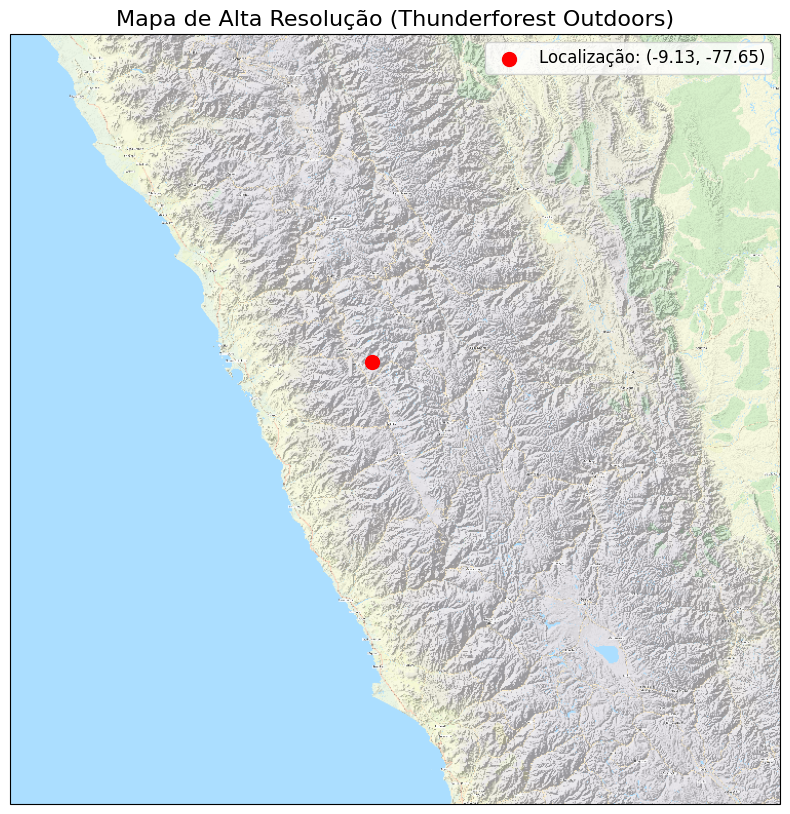

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.img_tiles import GoogleTiles

class Thunderforest(GoogleTiles):
    def __init__(self, api_key, layer='outdoors'):
        self.api_key = api_key
        self.layer = layer
        super().__init__()

    def _image_url(self, tile):
        x, y, z = tile
        url = (
            f"https://tile.thunderforest.com/{self.layer}/{z}/{x}/{y}.png?apikey={self.api_key}"
        )
        return url

# Configuração da localização
lat_filter = -9.13  # Latitude selecionada
lon_filter = -77.65  # Longitude selecionada

# Definir o domínio ampliado
lat_min, lat_max = -12, -7  # Limites de latitude
lon_min, lon_max = -80, -75  # Limites de longitude

# Criar o mapa
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

# Adicionar tiles Thunderforest
tiler = Thunderforest(api_key='14889dd6a0834e0496d657dc18e492ab', layer='outdoors')
ax.add_image(tiler, 10)  # Nível de zoom

# Marcar a localização no mapa
ax.scatter(lon_filter, lat_filter, color='red', s=100, label=f"Localização: ({lat_filter}, {lon_filter})", transform=ccrs.PlateCarree())

# Adicionar título e legenda
plt.title("Mapa de Alta Resolução (Thunderforest Outdoors)", fontsize=16)
plt.legend(loc='upper right', fontsize=12)

plt.show()


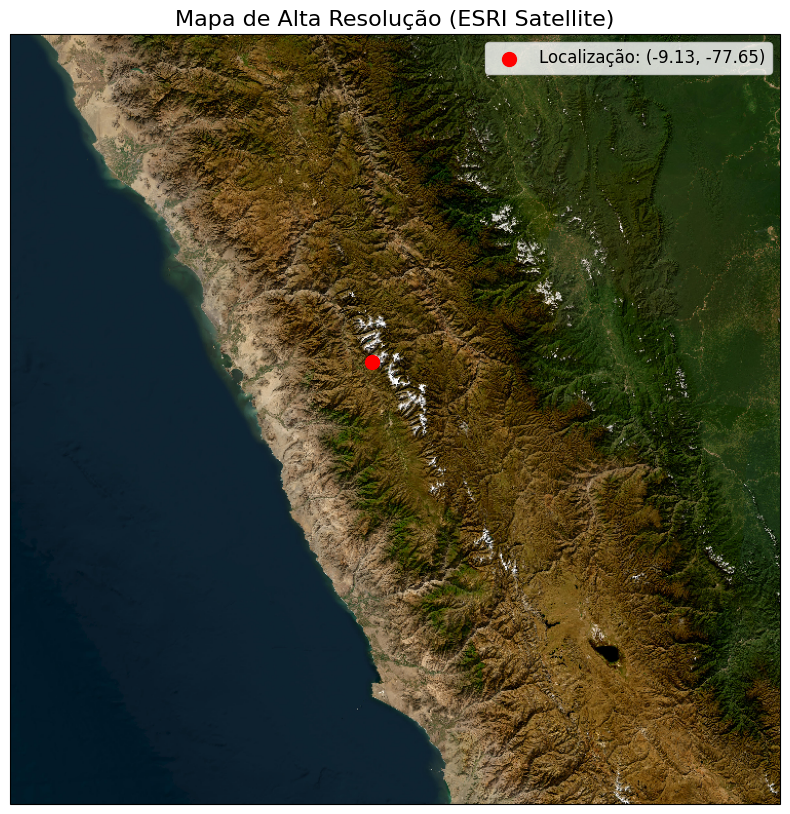

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.img_tiles import GoogleTiles

class ESRI(GoogleTiles):
    def _image_url(self, tile):
        x, y, z = tile
        url = (
            f"https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}.jpg"
        )
        return url

# Configuração da localização
lat_filter = -9.13  # Latitude selecionada
lon_filter = -77.65  # Longitude selecionada

# Definir o domínio ampliado
lat_min, lat_max = -12, -7  # Limites de latitude
lon_min, lon_max = -80, -75  # Limites de longitude

# Criar o mapa
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

# Adicionar tiles de alta resolução da ESRI
tiler = ESRI()
ax.add_image(tiler, 10)  # Nível de zoom

# Marcar a localização no mapa
ax.scatter(lon_filter, lat_filter, color='red', s=100, label=f"Localização: ({lat_filter}, {lon_filter})", transform=ccrs.PlateCarree())

# Adicionar título e legenda
plt.title("Mapa de Alta Resolução (ESRI Satellite)", fontsize=16)
plt.legend(loc='upper right', fontsize=12)

plt.show()


In [6]:
import ee
import geemap
import matplotlib.pyplot as plt

# Autenticar no Google Earth Engine
ee.Authenticate()
ee.Initialize()

# Definir a localização (latitude e longitude)
lat_filter = -9.13
lon_filter = -77.65
roi = ee.Geometry.Point([lon_filter, lat_filter]).buffer(10000).bounds()

# Coletar dados Sentinel-2
collection = ee.ImageCollection("COPERNICUS/S2_SR") \
    .filterBounds(roi) \
    .filterDate("2023-01-01", "2023-12-31") \
    .median()

# Visualizar os dados
Map = geemap.Map()
Map.centerObject(roi, 12)
Map.addLayer(collection, {"bands": ["B4", "B3", "B2"], "min": 0, "max": 3000}, "Sentinel-2")
Map.addLayer(roi, {}, "Ponto de Interesse")
Map.show()


ModuleNotFoundError: No module named 'ee'

In [1]:
import ee
import geemap

# Autenticação e inicialização do Google Earth Engine
ee.Initialize()

# Configuração da localização (latitude e longitude)
lat_filter = -9.13
lon_filter = -77.65
roi = ee.Geometry.Point([lon_filter, lat_filter]).buffer(10000).bounds()  # Buffer de 10 km ao redor do ponto

# Coletar dados Sentinel-2 (novo dataset harmonizado)
collection = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED") \
    .filterBounds(roi) \
    .filterDate("2023-01-01", "2023-12-31") \
    .median()  # Combina imagens para criar um mosaico

# Configuração para visualização (bandas RGB)
visual_params = {
    "bands": ["B4", "B3", "B2"],  # True color (vermelho, verde, azul)
    "min": 0,
    "max": 3000,
}

# Usar geemap para plotar o mapa interativo
Map = geemap.Map()
Map.centerObject(roi, 12)  # Centralizar o mapa no ROI com zoom 12
Map.addLayer(collection, visual_params, "Sentinel-2 (True Color)")
Map.addLayer(roi, {}, "Ponto de Interesse")
Map


Map(center=[-9.129978874159356, -77.64985911120853], controls=(WidgetControl(options=['position', 'transparent…

In [2]:
import ee
import geemap

# Autenticação e inicialização do Google Earth Engine
ee.Initialize()

# Configuração da localização (latitude e longitude)
lat_filter = -9.13
lon_filter = -77.65
roi = ee.Geometry.Point([lon_filter, lat_filter])  # Apenas o ponto, sem buffer

# Coletar dados Sentinel-2 (novo dataset harmonizado)
collection = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED") \
    .filterBounds(roi) \
    .filterDate("2023-01-01", "2023-12-31") \
    .median()  # Combina imagens para criar um mosaico

# Configuração para visualização (bandas RGB)
visual_params = {
    "bands": ["B4", "B3", "B2"],  # True color (vermelho, verde, azul)
    "min": 0,
    "max": 3000,
}

# Criar o mapa interativo
Map = geemap.Map()
Map.centerObject(roi, 12)  # Centralizar o mapa no ponto com zoom 12
Map.addLayer(collection, visual_params, "Sentinel-2 (True Color)")
Map.addLayer(roi, {}, "Ponto de Interesse")
Map


Map(center=[-9.13, -77.65], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataG…

In [7]:
import ee
import geemap

# Autenticação e inicialização do Google Earth Engine
ee.Initialize()

# Configuração da localização (latitude e longitude)
lat_filter = -9.13
lon_filter = -77.65
roi = ee.Geometry.Point([lon_filter, lat_filter])  # Apenas o ponto

# Função para filtrar imagens com baixa cobertura de nuvens
def mask_clouds(image):
    cloud_prob = image.select('QA60')  # Seleciona a banda de qualidade
    cloud_mask = cloud_prob.eq(0)  # Filtra pixels sem nuvens
    return image.updateMask(cloud_mask).copyProperties(image, ["system:time_start"])

# Coletar dados Sentinel-2 (novo dataset harmonizado)
collection = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED") \
    .filterBounds(roi) \
    .filterDate("2020-01-01", "2023-12-31") \
    .filterMetadata("CLOUDY_PIXEL_PERCENTAGE", "less_than", 10) \
    .map(mask_clouds) \
    .median()  # Combina imagens restantes para criar um mosaico

# Configuração para visualização (bandas RGB)
visual_params = {
    "bands": ["B4", "B3", "B2"],  # True color (vermelho, verde, azul)
    "min": 0,
    "max": 3000,
}

# Criar estilo personalizado para o ponto
point_style = {
    "color": "red",       # Cor da borda
    "fillColor": "red",   # Cor do preenchimento
    "pointSize": 10,      # Tamanho do triângulo
    "pointShape": "triangle",  # Formato do ponto (triângulo)
}

# Criar o mapa interativo
Map = geemap.Map()
Map.centerObject(roi, 12)  # Centralizar o mapa no ponto com zoom 12
Map.addLayer(collection, visual_params, "Sentinel-2 (True Color) - Baixa Cobertura de Nuvens")
Map.addLayer(roi, point_style, "Ponto de Interesse (Triângulo Vermelho)")
Map


Map(center=[-9.13, -77.65], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataG…

In [18]:
import ee
import geemap

# Autenticação e inicialização do Google Earth Engine
ee.Initialize()

# Configuração da localização (latitude e longitude)
lat_filter = -9.13
lon_filter = -77.65
roi = ee.Geometry.Point([lon_filter, lat_filter])  # Apenas o ponto de interesse

# Carregar dados ERA5 diários (precipitação acumulada por dia)
era5_daily = ee.ImageCollection("ECMWF/ERA5/DAILY") \
    .filterBounds(roi) \
    .filterDate("2004-01-01", "2020-12-31") \
    .select("total_precipitation")  # Banda de precipitação total acumulada

# Calcular a média diária da precipitação no período de 2004 a 2020
mean_precipitation_daily = era5_daily.mean()

# Calcular a média no ponto de interesse
mean_precipitation = mean_precipitation_daily.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=roi,
    scale=31000  # Resolução nativa do ERA5 (~31 km)
).get("total_precipitation").getInfo()

# Converter de metros para milímetros
mean_precipitation_mm = mean_precipitation * 1000

# Exibir o resultado no console
print(f"Média da Precipitação Diária no Ponto ({lat_filter}, {lon_filter}) "
      f"de 2004-01-01 a 2020-12-31: {mean_precipitation_mm:.2f} mm/dia")

# Criar o mapa interativo
Map = geemap.Map()
Map.centerObject(roi, 12)  # Centralizar o mapa no ponto com zoom 12

# Configuração para visualização (ERA5)
era5_visual_params = {
    "min": 0,
    "max": 5,  # Ajuste o valor máximo com base nos dados (em mm)
    "palette": ["blue", "cyan", "lime", "yellow", "red"],  # Paleta de cores
}

# Adicionar camada ERA5 ao mapa
Map.addLayer(mean_precipitation_daily.multiply(1000), era5_visual_params, "ERA5 Precipitação Diária (Média em mm/dia)")
Map.addLayer(roi, {"color": "red"}, "Ponto de Interesse")
Map


Média da Precipitação Diária no Ponto (-9.13, -77.65) de 2004-01-01 a 2020-12-31: 6.62 mm/dia


Map(center=[-9.13, -77.65], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataG…

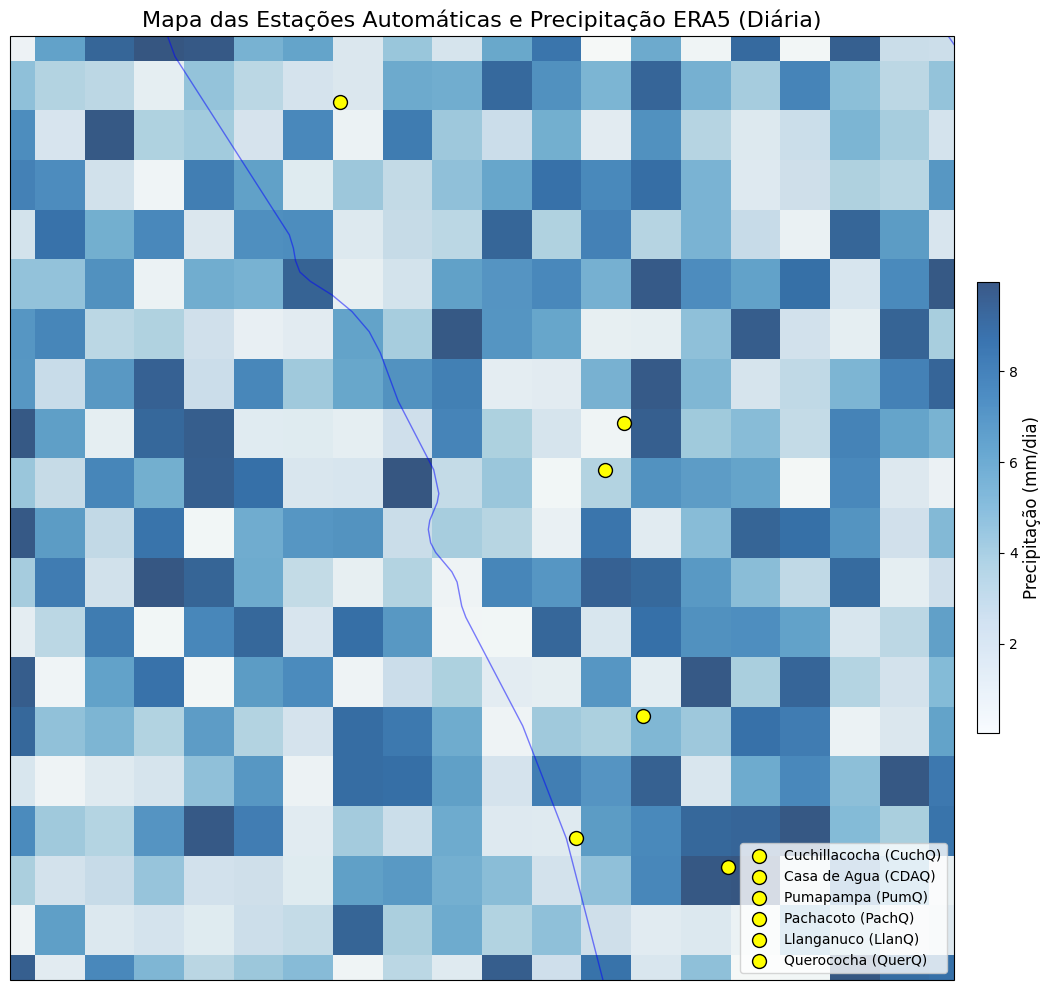

In [19]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Coordenadas das estações automáticas
stations = {
    "Cuchillacocha (CuchQ)": {"lat": -9.41, "lon": -77.35},
    "Casa de Agua (CDAQ)": {"lat": -9.46, "lon": -77.37},
    "Pumapampa (PumQ)": {"lat": -9.88, "lon": -77.24},
    "Pachacoto (PachQ)": {"lat": -9.85, "lon": -77.4},
    "Llanganuco (LlanQ)": {"lat": -9.07, "lon": -77.65},
    "Querococha (QuerQ)": {"lat": -9.72, "lon": -77.33},
}

# Dados simulados do ERA5 (substituir por dados reais se disponíveis)
# Geração de dados fictícios para fins ilustrativos
lats = np.linspace(-10, -9, 20)
lons = np.linspace(-78, -77, 20)
lon_grid, lat_grid = np.meshgrid(lons, lats)
era5_data = np.random.uniform(0, 10, size=lat_grid.shape)  # Precipitação em mm

# Configuração do mapa
fig, ax = plt.subplots(
    figsize=(12, 10),
    subplot_kw={"projection": ccrs.PlateCarree()}
)
ax.set_extent([-78, -77, -10, -9], crs=ccrs.PlateCarree())

# Adicionar relevo e feições
ax.add_feature(cfeature.LAND, edgecolor="black", zorder=0)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.RIVERS, edgecolor="blue", alpha=0.5)

# Adicionar os dados do ERA5
cmap = plt.cm.Blues
precip = ax.pcolormesh(lon_grid, lat_grid, era5_data, cmap=cmap, alpha=0.8)

# Adicionar as estações automáticas
for station, coords in stations.items():
    ax.scatter(
        coords["lon"], coords["lat"],
        color="yellow", edgecolor="black", s=100, zorder=5,
        label=station
    )

# Adicionar título e legenda
ax.set_title("Mapa das Estações Automáticas e Precipitação ERA5 (Diária)", fontsize=16)
ax.legend(loc="lower right", fontsize=10, frameon=True)

# Adicionar barra de cores
cbar = fig.colorbar(precip, ax=ax, orientation="vertical", fraction=0.02, pad=0.02)
cbar.set_label("Precipitação (mm/dia)", fontsize=12)

# Mostrar o mapa
plt.tight_layout()
plt.show()
